In [3]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

parameters = {
  'start': '1',
  'limit': '15',
  'convert': 'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(type(data))  # ✅ Print the type of the parsed JSON
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


<class 'dict'>


In [6]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
#This normalizes the data and makes it all pretty in a dataframe
print(data.keys())  # Make sure 'data' exists
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

dict_keys(['status', 'data'])


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12210,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.987546e+07,1.987546e+07,False,NaN,1,NaN,NaN,None,2025-06-07T09:15:00.000Z,104957.442579,4.425175e+10,-28.0790,-0.014840,1.253025,1.198748,5.366543,32.720390,22.324114,2.086077e+12,63.6925,2.204106e+12,None,2025-06-07T09:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:57:37.257392
1,1027,Ethereum,ETH,ethereum,10331,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207218e+08,1.207218e+08,True,NaN,2,NaN,NaN,None,2025-06-07T09:15:00.000Z,2489.131435,1.495744e+10,-46.8692,-0.034197,0.978131,-1.479761,28.467491,58.553289,14.349877,3.004923e+11,9.1747,3.004923e+11,None,2025-06-07T09:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:57:37.257392
2,825,Tether USDt,USDT,tether,131935,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.544683e+11,1.560037e+11,True,NaN,3,NaN,NaN,None,2025-06-07T09:14:00.000Z,1.000572,6.519518e+10,-34.1833,-0.043729,0.000954,0.030033,0.034479,0.088492,0.086926,1.545568e+11,4.7190,1.560930e+11,None,2025-06-07T09:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-06-07 14:57:37.257392
3,52,XRP,XRP,xrp,1623,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.882165e+10,9.998606e+10,False,NaN,4,NaN,NaN,None,2025-06-07T09:15:00.000Z,2.179401,1.774185e+09,-48.8063,-0.185097,1.627172,1.692797,-1.305957,16.265121,-6.024628,1.281960e+11,3.9141,2.179401e+11,None,2025-06-07T09:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:57:37.257392
4,1839,BNB,BNB,bnb,2566,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408871e+08,1.408871e+08,False,NaN,5,NaN,NaN,None,2025-06-07T09:14:00.000Z,647.996330,1.589617e+09,-25.1633,-0.165003,0.683880,-1.000056,5.105435,16.127462,11.094618,9.129432e+10,2.7874,9.129432e+10,None,2025-06-07T09:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:57:37.257392
5,5426,Solana,SOL,solana,933,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.248144e+08,6.025598e+08,True,NaN,6,NaN,NaN,None,2025-06-07T09:14:00.000Z,152.211789,2.619684e+09,-42.6674,-0.079963,2.699340,-1.691585,-0.347954,40.508552,9.510500,7.988294e+10,2.4390,9.171670e+10,None,2025-06-07T09:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:57:37.257392
6,3408,USDC,USDC,usd-coin,28505,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.111123e+10,6.111123e+10,False,NaN,7,6.090122e+10,6.089206e+10,None,2025-06-07T09:15:00.000Z,0.999850,8.805274e+09,-39.3775,-0.042692,-0.008788,-0.010519,-0.024160,-0.048130,0.004742,6.110204e+10,1.8656,6.110204e+10,None,2025-06-07T09:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-06-07 14:57:37.257392
7,74,Dogecoin,DOGE,dogecoin,1234,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.495843e+11,1.495843e+11,True,NaN,8,NaN,NaN,None,2025-06-07T09:15:00.000Z,0.185105,1.021367e+09,-49.1150,-0.092938,5.334769,-2.158743,1.238669,21.807357,-2.413621,2.768874e+10,0.8454,2.768874e+10,None,2025-06-07T09:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:57:37.257392
8,1958,TRON,TRX,tron,1183,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...

In [8]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)




In [ ]:
import os 
from time import sleep
from sys import exit

# Define or import your API runner function
def api_runner():
    print("Running API call...")  # Replace with actual logic

# Run the API every 60 seconds, 333 times
for i in range(333):
    api_runner()
    print(f'API Runner completed iteration {i + 1}')
    sleep(60)  # sleep for 1 minute

exit()  # Exit the program


In [ ]:
df72 = pd.read_csv(r'C:\Users\suman\Desktop\suman java')

In [11]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12210,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.987546e+07,1.987546e+07,False,NaN,1,NaN,NaN,None,2025-06-07T09:15:00.000Z,104957.442579,4.425175e+10,-28.0790,-0.014840,1.253025,1.198748,5.366543,32.720390,22.324114,2.086077e+12,63.6925,2.204106e+12,None,2025-06-07T09:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:57:37.257392
1,1027,Ethereum,ETH,ethereum,10331,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207218e+08,1.207218e+08,True,NaN,2,NaN,NaN,None,2025-06-07T09:15:00.000Z,2489.131435,1.495744e+10,-46.8692,-0.034197,0.978131,-1.479761,28.467491,58.553289,14.349877,3.004923e+11,9.1747,3.004923e+11,None,2025-06-07T09:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:57:37.257392
2,825,Tether USDt,USDT,tether,131935,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.544683e+11,1.560037e+11,True,NaN,3,NaN,NaN,None,2025-06-07T09:14:00.000Z,1.000572,6.519518e+10,-34.1833,-0.043729,0.000954,0.030033,0.034479,0.088492,0.086926,1.545568e+11,4.7190,1.560930e+11,None,2025-06-07T09:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-06-07 14:57:37.257392
3,52,XRP,XRP,xrp,1623,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.882165e+10,9.998606e+10,False,NaN,4,NaN,NaN,None,2025-06-07T09:15:00.000Z,2.179401,1.774185e+09,-48.8063,-0.185097,1.627172,1.692797,-1.305957,16.265121,-6.024628,1.281960e+11,3.9141,2.179401e+11,None,2025-06-07T09:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:57:37.257392
4,1839,BNB,BNB,bnb,2566,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408871e+08,1.408871e+08,False,NaN,5,NaN,NaN,None,2025-06-07T09:14:00.000Z,647.996330,1.589617e+09,-25.1633,-0.165003,0.683880,-1.000056,5.105435,16.127462,11.094618,9.129432e+10,2.7874,9.129432e+10,None,2025-06-07T09:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:57:37.257392
5,5426,Solana,SOL,solana,933,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.248144e+08,6.025598e+08,True,NaN,6,NaN,NaN,None,2025-06-07T09:14:00.000Z,152.211789,2.619684e+09,-42.6674,-0.079963,2.699340,-1.691585,-0.347954,40.508552,9.510500,7.988294e+10,2.4390,9.171670e+10,None,2025-06-07T09:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:57:37.257392
6,3408,USDC,USDC,usd-coin,28505,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.111123e+10,6.111123e+10,False,NaN,7,6.090122e+10,6.089206e+10,None,2025-06-07T09:15:00.000Z,0.999850,8.805274e+09,-39.3775,-0.042692,-0.008788,-0.010519,-0.024160,-0.048130,0.004742,6.110204e+10,1.8656,6.110204e+10,None,2025-06-07T09:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-06-07 14:57:37.257392
7,74,Dogecoin,DOGE,dogecoin,1234,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.495843e+11,1.495843e+11,True,NaN,8,NaN,NaN,None,2025-06-07T09:15:00.000Z,0.185105,1.021367e+09,-49.1150,-0.092938,5.334769,-2.158743,1.238669,21.807357,-2.413621,2.768874e+10,0.8454,2.768874e+10,None,2025-06-07T09:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:57:37.257392
8,1958,TRON,TRX,tron,1183,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...

In [16]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.014840,1.253025,1.198748,5.366543,32.720390,22.324114
Ethereum,-0.034197,0.978131,-1.479761,28.467491,58.553289,14.349877
Tether USDt,-0.043729,0.000954,0.030033,0.034479,0.088492,0.086926
XRP,-0.185097,1.627172,1.692797,-1.305957,16.265121,-6.024628
BNB,-0.165003,0.683880,-1.000056,5.105435,16.127462,11.094618
Solana,-0.079963,2.699340,-1.691585,-0.347954,40.508552,9.510500
USDC,-0.042692,-0.008788,-0.010519,-0.024160,-0.048130,0.004742
Dogecoin,-0.092938,5.334769,-2.158743,1.238669,21.807357,-2.413621
TRON,0.175929,1.116253,3.931250,11.175576,18.825622,15.731666


In [17]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      -0.014840
              quote.USD.percent_change_24h      1.253025
              quote.USD.percent_change_7d       1.198748
              quote.USD.percent_change_30d      5.366543
              quote.USD.percent_change_60d     32.720390
              quote.USD.percent_change_90d     22.324114
Ethereum      quote.USD.percent_change_1h      -0.034197
              quote.USD.percent_change_24h      0.978131
              quote.USD.percent_change_7d      -1.479761
              quote.USD.percent_change_30d     28.467491
              quote.USD.percent_change_60d     58.553289
              quote.USD.percent_change_90d     14.349877
Tether USDt   quote.USD.percent_change_1h      -0.043729
              quote.USD.percent_change_24h      0.000954
              quote.USD.percent_change_7d       0.030033
              quote.USD.percent_change_30d      0.034479
              quote.USD.percent_change_60d   

In [18]:
type(df4)

pandas.core.series.Series

In [19]:
df5 = df4.to_frame(name='values')
df5

values
name                                                 
Bitcoin      quote.USD.percent_change_1h    -0.014840
             quote.USD.percent_change_24h    1.253025
             quote.USD.percent_change_7d     1.198748
             quote.USD.percent_change_30d    5.366543
             quote.USD.percent_change_60d   32.720390
             quote.USD.percent_change_90d   22.324114
Ethereum     quote.USD.percent_change_1h    -0.034197
             quote.USD.percent_change_24h    0.978131
             quote.USD.percent_change_7d    -1.479761
             quote.USD.percent_change_30d   28.467491
             quote.USD.percent_change_60d   58.553289
             quote.USD.percent_change_90d   14.349877
Tether USDt  quote.USD.percent_change_1h    -0.043729
             quote.USD.percent_change_24h    0.000954
             quote.USD.percent_change_7d     0.030033
             quote.USD.percent_change_30d    0.034479
             quote.USD.percent_change_60d    0.088492
             quote.USD.percent_change_90d    0.086926
XRP          quote.USD.percent_change_1h    -0.185097
             quote.USD.percent_change_24h    1.627172
             quote.USD.percent_change_7d     1.692797
             quote.USD.percent_change_30d   -1.305957
             quote.USD.percent_change_60d   16.265121
             quote.USD.percent_change_90d   -6.024628
BNB          quote.USD.percent_change_1h    -0.165003
             quote.USD.percent_change_24h    0.683880
             quote.USD.percent_change_7d    -1.000056
             quote.USD.percent_change_30d    5.105435
             quote.USD.percent_change_60d   16.127462
             quote.USD.percent_change_90d   11.094618
Solana       quote.USD.percent_change_1h    -0.079963
             quote.USD.percent_change_24h    2.699340
             quote.USD.percent_change_7d    -1.691585
             quote.USD.percent_change_30d   -0.347954
             quote.USD.percent_change_60d   40.508552
             quote.USD.percent_change_90d    9.510500
USDC         quote.USD.percent_change_1h    -0.042692
             quote.USD.percent_change_24h   -0.008788
             quote.USD.percent_change_7d    -0.010519
             quote.USD.percent_change_30d   -0.024160
             quote.USD.percent_change_60d   -0.048130
             quote.USD.percent_change_90d    0.004742
Dogecoin     quote.USD.percent_change_1h    -0.092938
             quote.USD.percent_change_24h    5.334769
             quote.USD.percent_change_7d    -2.158743
             quote.USD.percent_change_30d    1.238669
             quote.USD.percent_change_60d   21.807357
             quote.USD.percent_change_90d   -2.413621
TRON         quote.USD.percent_change_1h     0.175929
             quote.USD.percent_change_24h    1.116253
             quote.USD.percent_change_7d     3.931250
             quote.USD.percent_change_30d   11.175576
             quote.USD.percent_change_60d   18.825622
             quote.USD.percent_change_90d   15.731666
Cardano      quote.USD.percent_change_1h    -0.454636
             quote.USD.percent_change_24h    3.541469
             quote.USD.percent_change_7d    -0.630003
             quote.USD.percent_change_30d   -6.955567
             quote.USD.percent_change_60d   14.451995
             quote.USD.percent_change_90d  -17.783670
Hyperliquid  quote.USD.percent_change_1h    -0.675515
             quote.USD.percent_change_24h   -2.500336
             quote.USD.percent_change_7d     7.609159
             quote.USD.percent_change_30d   55.051051
             quote.USD.percent_change_60d  182.490440
             quote.USD.percent_change_90d  122.432998
Sui          quote.USD.percent_change_1h    -0.220159
             quote.USD.percent_change_24h    6.687105
             quote.USD.percent_change_7d     3.386272
             quote.USD.percent_change_30d  -11.405172
             quote.USD.percent_change_60d   61.709070
             quote.USD.percent_change_90d   31.897320
Chainlink    quote.USD.percent_change_1h    -0.5258

In [20]:
df5.count()

values    90
dtype: int64

In [21]:

index = pd.Index(range(90))

df6 = df5.set_index(index)
df6

,values
0,-0.014840
1,1.253025
2,1.198748
3,5.366543
4,32.720390
5,22.324114
6,-0.034197
7,0.978131
8,-1.479761
9,28.467491


In [22]:

df7 = df6.rename(columns={'level_1': 'percent_change'})
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12210,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.987546e+07,1.987546e+07,False,NaN,1,NaN,NaN,None,2025-06-07T09:15:00.000Z,104957.442579,4.425175e+10,-28.0790,-0.014840,1.253025,1.198748,5.366543,32.720390,22.324114,2.086077e+12,63.6925,2.204106e+12,None,2025-06-07T09:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:57:37.257392
1,1027,Ethereum,ETH,ethereum,10331,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207218e+08,1.207218e+08,True,NaN,2,NaN,NaN,None,2025-06-07T09:15:00.000Z,2489.131435,1.495744e+10,-46.8692,-0.034197,0.978131,-1.479761,28.467491,58.553289,14.349877,3.004923e+11,9.1747,3.004923e+11,None,2025-06-07T09:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:57:37.257392
2,825,Tether USDt,USDT,tether,131935,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.544683e+11,1.560037e+11,True,NaN,3,NaN,NaN,None,2025-06-07T09:14:00.000Z,1.000572,6.519518e+10,-34.1833,-0.043729,0.000954,0.030033,0.034479,0.088492,0.086926,1.545568e+11,4.7190,1.560930e+11,None,2025-06-07T09:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-06-07 14:57:37.257392
3,52,XRP,XRP,xrp,1623,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.882165e+10,9.998606e+10,False,NaN,4,NaN,NaN,None,2025-06-07T09:15:00.000Z,2.179401,1.774185e+09,-48.8063,-0.185097,1.627172,1.692797,-1.305957,16.265121,-6.024628,1.281960e+11,3.9141,2.179401e+11,None,2025-06-07T09:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:57:37.257392
4,1839,BNB,BNB,bnb,2566,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408871e+08,1.408871e+08,False,NaN,5,NaN,NaN,None,2025-06-07T09:14:00.000Z,647.996330,1.589617e+09,-25.1633,-0.165003,0.683880,-1.000056,5.105435,16.127462,11.094618,9.129432e+10,2.7874,9.129432e+10,None,2025-06-07T09:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:57:37.257392
5,5426,Solana,SOL,solana,933,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.248144e+08,6.025598e+08,True,NaN,6,NaN,NaN,None,2025-06-07T09:14:00.000Z,152.211789,2.619684e+09,-42.6674,-0.079963,2.699340,-1.691585,-0.347954,40.508552,9.510500,7.988294e+10,2.4390,9.171670e+10,None,2025-06-07T09:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:57:37.257392
6,3408,USDC,USDC,usd-coin,28505,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.111123e+10,6.111123e+10,False,NaN,7,6.090122e+10,6.089206e+10,None,2025-06-07T09:15:00.000Z,0.999850,8.805274e+09,-39.3775,-0.042692,-0.008788,-0.010519,-0.024160,-0.048130,0.004742,6.110204e+10,1.8656,6.110204e+10,None,2025-06-07T09:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-06-07 14:57:37.257392
7,74,Dogecoin,DOGE,dogecoin,1234,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.495843e+11,1.495843e+11,True,NaN,8,NaN,NaN,None,2025-06-07T09:15:00.000Z,0.185105,1.021367e+09,-49.1150,-0.092938,5.334769,-2.158743,1.238669,21.807357,-2.413621,2.768874e+10,0.8454,2.768874e+10,None,2025-06-07T09:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:57:37.257392
8,1958,TRON,TRX,tron,1183,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...

In [ ]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

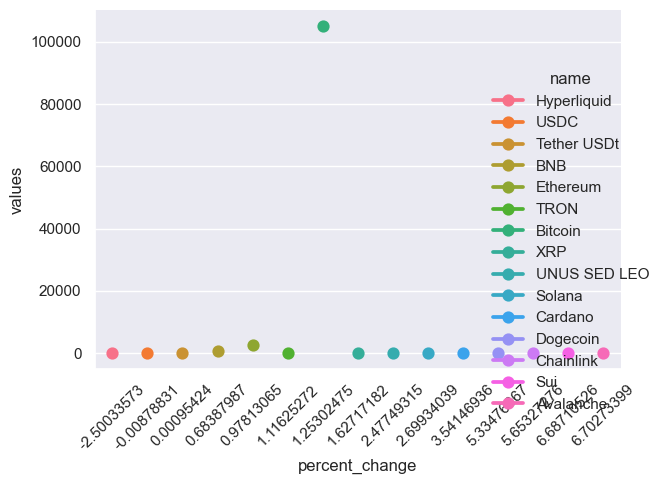

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(
    x='percent_change',
    y='values',
    hue='name',
    data=df7,
    kind='point'
)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
print(df7.columns)


Index(['values'], dtype='object')


In [30]:
# After normalizing CoinMarketCap API JSON
df7 = pd.json_normalize(data['data'])

# Check correct column names
print(df7.columns)


Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address'],
      dtype='object')


In [31]:
df7.rename(columns={'quote.USD.percent_change_24h': 'percent_change',
                    'quote.USD.price': 'values'}, inplace=True)


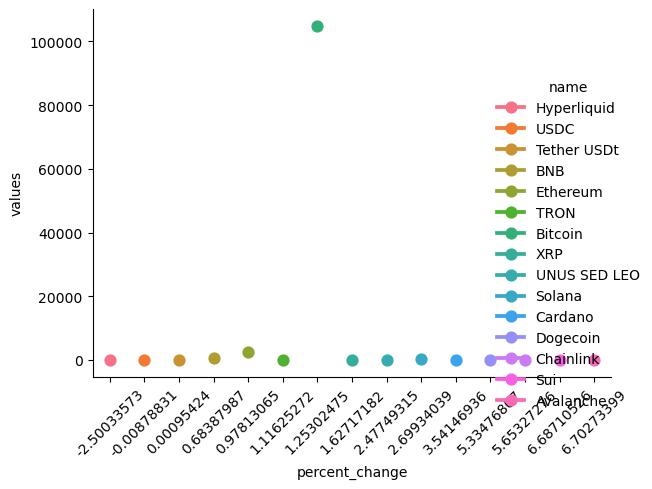

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


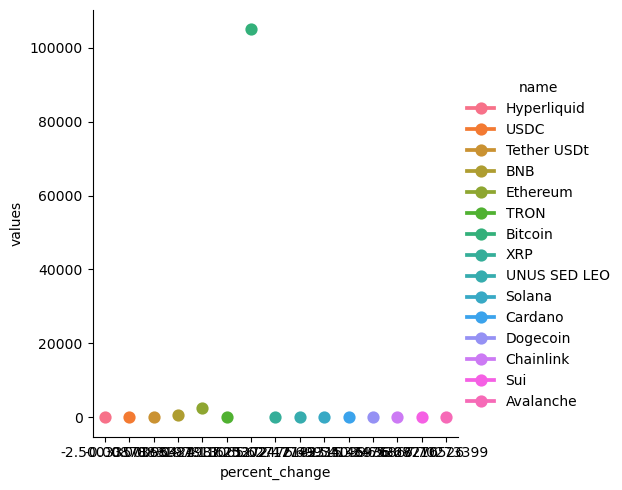

In [33]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [34]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,104957.442579,2025-06-07 14:57:37.257392


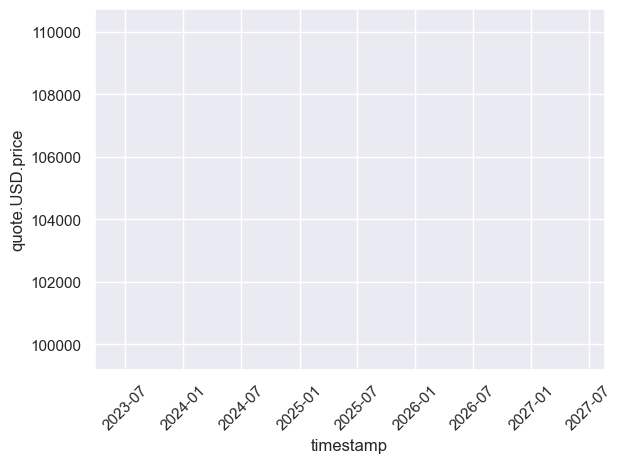

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert timestamp
df10['timestamp'] = pd.to_datetime(df10['timestamp'])

# Drop NaNs
df10 = df10.dropna(subset=['timestamp', 'quote.USD.price'])

# Set theme and plot
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
